In [7]:
import os
from PIL import Image, UnidentifiedImageError
from PIL.TiffTags import TAGS
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe" #il faut mettre là où tesseract est installé

import time

In [4]:
#################################### A MODIFIER SELON SA PROPRE ARBORESCENCE
project_path = 'D:/Projet/mai25_bds_extraction/' 
####################################

raw_data_path = os.path.join(project_path, 'data_sample', 'raw')
processed_data_path = os.path.join(project_path, 'data', 'processed')
rvl_cdip_images_path = os.path.join(raw_data_path, 'RVL-CDIP', 'images')

In [5]:
def get_rvl_cdip_image_files(path):
    tmp_list = []
    for foldername, _, filenames in os.walk(path):
        if filenames:
            filename = filenames[0]
            # we check that the structure is relevant to our expectation with 2 assert
            assert len(filenames) == 1
            if filename.startswith('.'): # avoid to consider files like .DS_Store on mac
                continue
            assert filename.endswith(".tif"), f"{foldername},{filename}"
            tmp_list.append([
                os.path.relpath(foldername, rvl_cdip_images_path),
                filename
            ])
    return pd.DataFrame(tmp_list, columns = ["relative_path", "filename"])


In [6]:
t = time.time()
df = get_rvl_cdip_image_files(rvl_cdip_images_path)
print(f"Duree d'exécution: {time.time() - t:.3f} secondes.")
print(f"({len(df)} images traitées)\n")

df.head()

Duree d'exécution: 0.079 secondes.
(139 images traitées)



,relative_path,filename
0,imagesa\a\a\a\aaa06d00,50486482-6482.tif
1,imagesa\a\a\a\aaa08d00,2072197187.tif
2,imagesa\a\a\a\aaa09e00,2029372116.tif
3,imagesa\a\a\a\aaa10c00,2085133627a.tif
4,imagesa\a\a\a\aaa11d00,515558347+-8348.tif


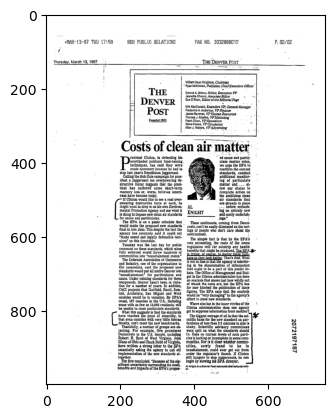

In [10]:
relative_filepath, filename = df.iloc[1, :]
file_path = os.path.join(rvl_cdip_images_path, relative_filepath, filename)
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()